#  RFM Project  

### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
from datetime import timedelta
import datetime as dt

df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")

In [41]:
df = df_.copy()
df.columns= df.columns.str.lower()
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [42]:
# Num of unique product
df["description"].nunique()

4223

In [43]:
# How many products are processed?
df["description"].value_counts().count

<bound method Series.count of WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
add stock to allocate online orders       1
Wrongly mrked had 85123a in box           1
temp adjustment                           1
GREEN WITH METAL BAG CHARM                1
ETCHED GLASS STAR TREE DECORATION         1
Name: description, Length: 4223, dtype: int64>

In [44]:
# Most ordered product
mo = pd.DataFrame(df.groupby("description").agg({"quantity":"sum"}).sort_values(by = "quantity", ascending=False))
print("Most ordered product is => ", mo.index[0])

Most ordered product is =>  WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [45]:
# Total invoice number
df["invoice"].nunique()

25900

In [46]:
# Which products are most expensive
df["price"].sort_values(ascending=False)

222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
16356     13541.33
            ...   
345008        0.00
345010        0.00
40984         0.00
299983   -11062.06
299984   -11062.06
Name: price, Length: 541910, dtype: float64

In [47]:
# Total number of orders per country
df["country"].nunique()

38

In [48]:
# average income per invoice
# firstly remove minus (-) values, It is necessary to remove the returned products from the list
df = df[~df["invoice"].str.contains("C", na= False)]

# Creating total price
df["total price"] = df["quantity"] * df["price"]
# Total income per country
df.groupby("country").agg({"total price":"sum"}).sort_values("total price", ascending=False)

,total price
country,
United Kingdom,9.003098e+06
Netherlands,2.854463e+05
EIRE,2.834540e+05
Germany,2.288671e+05
France,2.097331e+05
Australia,1.385213e+05
Spain,6.157711e+04
Switzerland,5.708990e+04
Belgium,4.119634e+04


###       2. Data Preprocessing

In [49]:
print(df.isnull().sum())


invoice             0
stockcode           0
description      1454
quantity            0
invoicedate         0
price               0
customer id    134697
country             0
total price         0
dtype: int64


In [57]:
df.dropna(axis=0,inplace=True)

In [58]:
describe_list = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
df.describe(describe_list).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,397925.0,13.021793,180.419984,1.0,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.0,120.00,80995.00
price,397925.0,3.116212,22.096773,0.0,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.5,14.95,8142.75
customer id,397925.0,15294.308601,1713.172738,12346.0,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.0,18211.00,18287.00
total price,397925.0,22.394737,309.055200,0.0,0.55,1.25,1.95,4.68,11.80,19.80,35.40,67.5,202.50,168469.60


In [59]:
# For future steps, we consider a few days after the last date in the data as today's date.
last_date = df["invoicedate"].dt.date.max()
today_date = last_date + timedelta(days=3)

rfm = df.groupby('customer id').agg({'invoicedate': lambda Date: (today_date - Date.dt.date.max()).days,
                                     'invoice': lambda num: len(num),
                                     'total price': lambda totalprice: totalprice.sum()})


In [60]:
rfm.head()

,invoicedate,invoice,total price
customer id,,,
12346.0,328,1,77183.60
12347.0,5,182,4310.00
12348.0,78,31,1797.24
12349.0,21,73,1757.55
12350.0,313,17,334.40


In [61]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [62]:
rfm["Recency_Score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["Frequency_Score"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])

rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [63]:
rfm["RFM_SCORE"] = (rfm['Recency_Score'].astype(str) +
                    rfm['Frequency_Score'].astype(str) +
                    rfm['Monetary_Score'].astype(str))

In [68]:
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
customer id,,,,,,,
12346.0,328,1,77183.60,1,1,5,115
12347.0,5,182,4310.00,5,5,5,555
12348.0,78,31,1797.24,2,3,4,234
12349.0,21,73,1757.55,4,4,4,444
12350.0,313,17,334.40,1,2,2,122


In [65]:
rfm[rfm["RFM_SCORE"] == "321"].head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
customer id,,,,,,,
12581.0,42,15,197.71,3,2,1,321
12718.0,74,19,238.25,3,2,1,321
12812.0,47,15,229.64,3,2,1,321
12923.0,67,29,176.97,3,2,1,321
13193.0,64,29,117.88,3,2,1,321


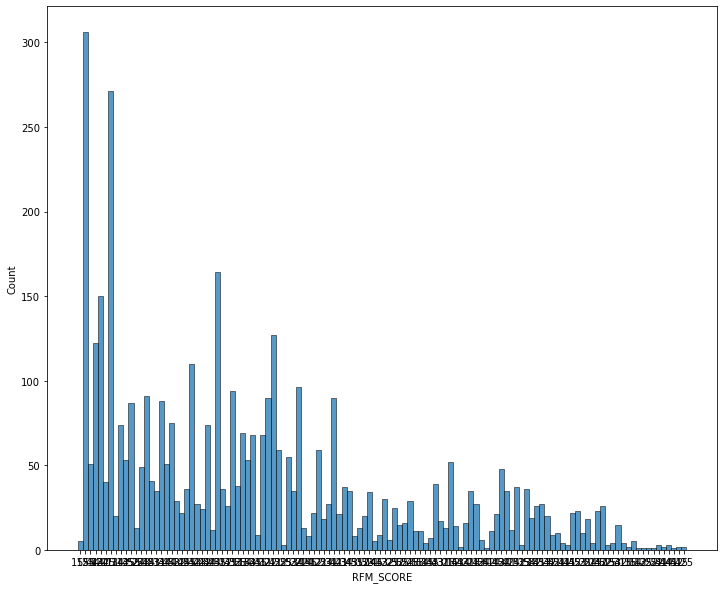

In [26]:
# Plot distribution of RFM Score
plt.figure(figsize=(12,10))
sns.histplot(rfm["RFM_SCORE"])
plt.show()

C:\Users\ogulc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ogulc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ogulc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

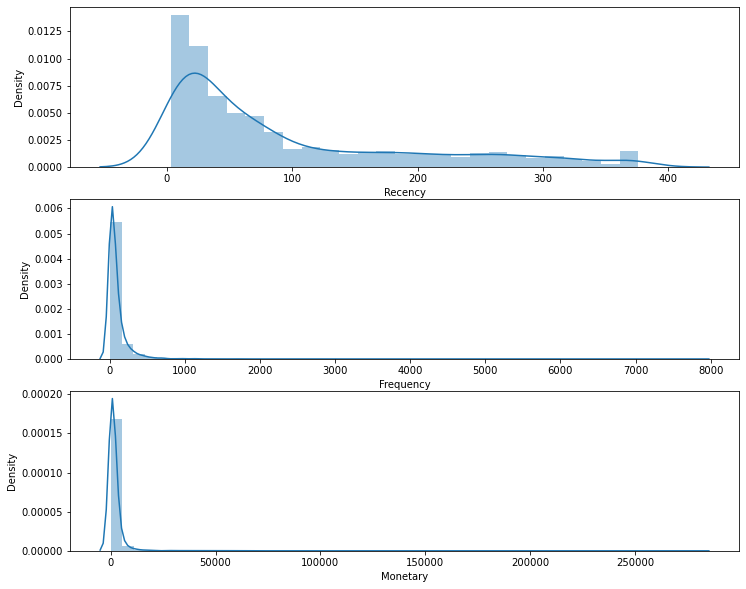

In [27]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['Monetary'])
# Show the plot
plt.show()

In [70]:
# Let's apply the meaningful segmentation corresponding to the RFM score.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [71]:
rfm['Segment'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str)

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["customer id"]].nunique()
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency         Frequency           Monetary      
                           mean count        mean count         mean count
Segment                                                                   
About_to_Sleep        55.192547   322   15.987578   322   450.997174   322
At_Risk              168.435852   569   56.859402   569   996.916872   569
Cant_Loose           146.226190    84  181.666667    84  2370.705012    84
Champions              8.400990   606  289.031353   606  6960.915446   606
Hibernating          212.251397  1074   13.589385  1074   536.535672  1074
Loyal_Customers       36.206854   817  157.116279   817  2845.732852   817
Need_Attention        54.985366   205   41.736585   205   856.195854   205
New_Customers          9.421053    57    7.578947    57  3618.697018    57
Potential_Loyalists   18.668699   492   34.945122   492   915.486994   492
Promising             25.437500   112    7.767857   112   429.433929   112

---

If we need to interpret these 3 segments both in terms of action decisions and in terms of the structure of the segments (in terms of average RFM values) by selecting 3 segments after segmenting the customers.

Suppose we select At_Risk, Loyal_Customers and Champions segments.


It is a known fact in marketing that the money spent on getting a new customer is more than the money you spend on someone who is already your customer to remain your customer.


##### At Risk 
That's why the at_risk group is of great importance to us. Those who have shopped frequently in the past
but haven't had a shopping record recently are the ones that make up this category.  
It is necessary to restore these people's old habits. It is understandable that 13% of our customers are in
this group, but it is acceptable to have a lower rate.  
Special campaigns, effective communication and attractive new methods can be applied to reduce this number.

In [73]:
num_of_customer = rfm.shape[0]
num_of_atrisk = len(rfm[rfm["Segment"] == "At_Risk"].index)
ratio_risk = num_of_atrisk/num_of_customer
print(ratio_risk)

0.13116643614568926


#### Loyal Customers 
Although not as much as the champions category, this segment has recently shopped.
The audience that shoppers very often is Loyal Customer for us.
This category, which we will call the second most valuable category for us. This segment
literally loves to shop. All businesses should strive to increase customer loyalty to keep
customers purchasing and to promote their brand to new audiences. Increasing brand loyalty
with email marketing will get them into the champions category for us.


In [33]:
num_of_loyals = len(rfm[rfm["Segment"] == "Loyal_Customers"].index)
ratio_loyal = num_of_loyals/num_of_customer
ratio_loyal

0.18833563854310742

It's not surprising that this ratio is 18%, but a higher one wouldn't be bad for us. However, considering that the proportion of the Champions segment is 13%, further increase in this ratio will
support the Champions segment in the future.

#### Champions 
Customers in this segment have high shopping frequency and customer Recency value, and in this context,
their return to us is also high. This is the group that should have the highest priority for us.
Therefore, retaining customers is the most important thing for us. Making interesting campaigns and
announcements targeting these customers will support the sales. It is necessary to protect the frequency
of the customers by supporting them with applications such as loyalty points.


In [36]:
num_of_champs = len(rfm[rfm["Segment"] == "Champions"])
ratio_champs = num_of_champs/num_of_customer
ratio_champs

0.1396957123098202

If we think with Loyal_customer, the return of this community, which has a little more than a quarter of our general customer base, is very important to us.

#### Lets Export Loyal Customers' ids


In [ ]:
loyals_ids =rfm[rfm["Segment"].str.contains("Loyal_Customers", na=False)]
loyals_ids.index = loyals_ids.index.astype(int)
loyals_ids = pd.DataFrame(loyals_ids.index.values)
loyals_ids.to_csv('loyals.csv', index=True)

---

The process of assigning scores using qcut according to Recency, Frequency and Monetary values tries to keep all scores in the same or similar distribution.

 If we look at the log distribution of these values, we see that the densities are generally increased at the middle values and the values are not limited to  5 (especially for Frequency and Monetary). Here, more accurate results can be obtained with an unsupervised clustering operation such as k-means.

In [38]:
print(rfm[["Recency_Score"]].value_counts())
  
print(rfm["Frequency_Score"].value_counts())
  
print(rfm["Monetary_Score"].value_counts())

rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
#or rfm_log = np.log(rfm_rfm)
rfm_log

Recency_Score
4                880
5                868
2                866
3                863
1                861
dtype: int64
1    927
5    867
4    859
3    855
2    830
Name: Frequency_Score, dtype: int64
5    868
3    868
1    868
4    867
2    867
Name: Monetary_Score, dtype: int64


,Recency,Frequency,Monetary
customer id,,,
12346.0,5.793,0.000,11.254
12347.0,1.609,5.204,8.369
12348.0,4.357,3.434,7.494
12349.0,3.045,4.290,7.472
12350.0,5.746,2.833,5.812
...,...,...,...
18280.0,5.635,2.303,5.196
18281.0,5.209,1.946,4.392
18282.0,2.303,2.485,5.182


C:\Users\ogulc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ogulc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ogulc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

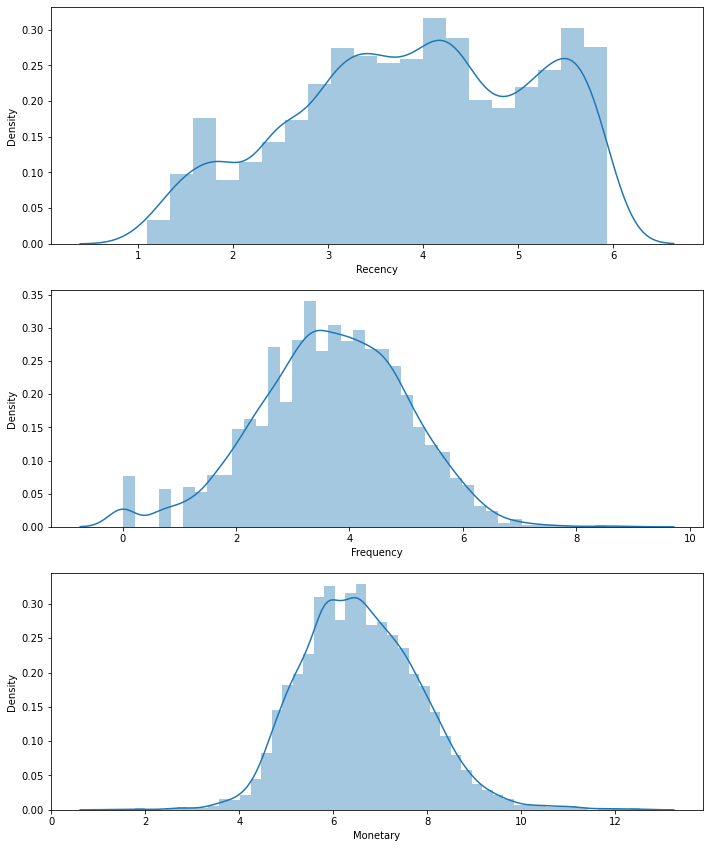

In [39]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1)
sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2)
sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3)
sns.distplot(rfm_log.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()